Número de agentes | Tiempo medio de espera (min) | Probabilidad de bloqueo
                 4 |                        1.07 |                  0.1499
                 5 |                        0.26 |                  0.0697
                 6 |                        0.07 |                  0.0282
                 7 |                        0.02 |                  0.0100
                 8 |                        0.00 |                  0.0031
                 9 |                        0.00 |                  0.0009
                10 |                        0.00 |                  0.0002


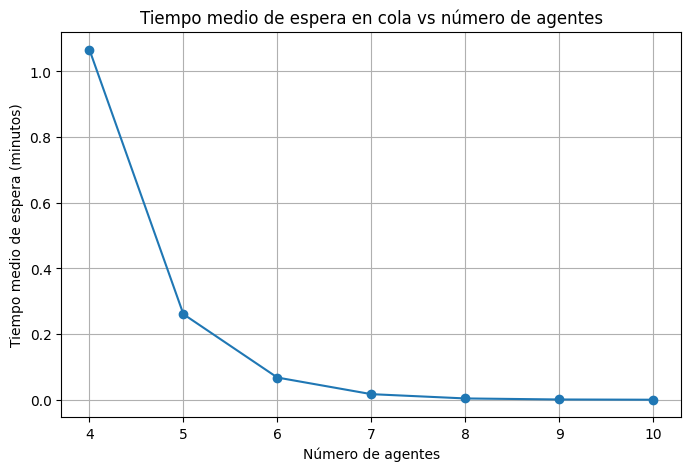

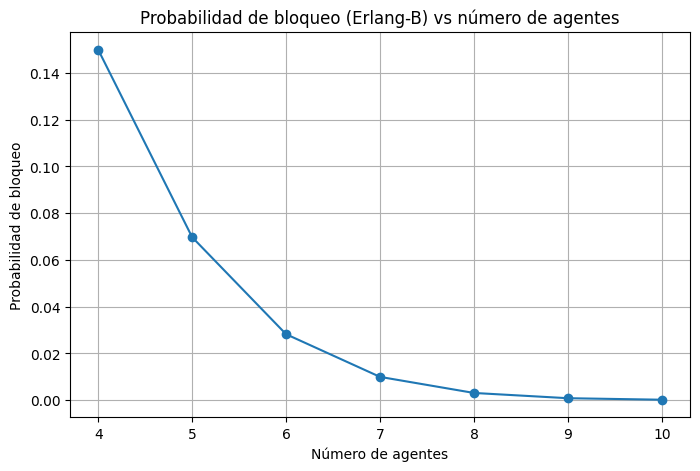

In [1]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import math

# Funciones para Erlang-C
def erlang_c_p0(traffic, servers):
    rho = traffic / servers
    sum_terms = sum((traffic ** n) / math.factorial(n) for n in range(servers))
    last_term = (traffic ** servers) / (math.factorial(servers) * (1 - rho))
    denominator = sum_terms + last_term
    return 1 / denominator

def erlang_c_pw(traffic, servers):
    rho = traffic / servers
    if rho >= 1:
        return 1
    p0 = erlang_c_p0(traffic, servers)
    numerator = ((traffic ** servers) / math.factorial(servers)) * (1 / (1 - rho)) * p0
    return numerator

def erlang_c_wq(arrival_rate, service_rate, servers):
    traffic = arrival_rate / service_rate
    rho = traffic / servers
    if rho >= 1:
        return np.inf
    pw = erlang_c_pw(traffic, servers)
    wq = pw / (servers * service_rate - arrival_rate)
    return wq

# Función para Erlang-B
def erlang_b_pb(traffic, servers):
    inv_b = 1.0
    for k in range(1, servers + 1):
        inv_b = 1 + inv_b * (k / traffic)
    return 1 / inv_b

# Parámetros base
arrival_rate = 30 / 60  # 30 llamadas/hora = 0.5 llamadas/minuto
service_time = 5  # minutos
service_rate = 1 / service_time  # 0.2 llamadas/minuto
traffic = arrival_rate / service_rate  # tráfico en Erlangs

# Evaluación sobre un rango de agentes
agents_range = range(4, 11)
wq_list = []
pb_list = []

for s in agents_range:
    wq = erlang_c_wq(arrival_rate, service_rate, s)
    pb = erlang_b_pb(traffic, s)
    wq_list.append(wq)
    pb_list.append(pb)

# Mostrar resultados tabulados
print("Número de agentes | Tiempo medio de espera (min) | Probabilidad de bloqueo")
for s, wq, pb in zip(agents_range, wq_list, pb_list):
    print(f"{s:>18} | {wq:>27.2f} | {pb:>23.4f}")

# Gráfica tiempo medio de espera
plt.figure(figsize=(8, 5))
plt.plot(agents_range, wq_list, marker='o')
plt.title('Tiempo medio de espera en cola vs número de agentes')
plt.xlabel('Número de agentes')
plt.ylabel('Tiempo medio de espera (minutos)')
plt.grid(True)
plt.show()

# Gráfica probabilidad de bloqueo
plt.figure(figsize=(8, 5))
plt.plot(agents_range, pb_list, marker='o')
plt.title('Probabilidad de bloqueo (Erlang-B) vs número de agentes')
plt.xlabel('Número de agentes')
plt.ylabel('Probabilidad de bloqueo')
plt.grid(True)
plt.show()



In [2]:
import heapq

# Parámetros simulación
np.random.seed(42)  # reproducibilidad
num_agents = 6
simulation_time = 4 * 60  # 4 horas en minutos

arrival_rate = 30 / 60  # 0.5 llamadas/minuto
service_time_mean = 5  # minutos

# Estado del sistema
agent_available_times = [0] * num_agents
queue = []

# Métricas a recolectar
wait_times = []
num_calls = 0

# Generar tiempos de llegada
arrival_times = []
current_time = 0
while current_time < simulation_time:
    interarrival = np.random.exponential(1 / arrival_rate)
    current_time += interarrival
    if current_time < simulation_time:
        arrival_times.append(current_time)

# Simulación
for arrival in arrival_times:
    # Revisar agentes ocupados hasta ese momento
    soonest_available = min(agent_available_times)
    if soonest_available <= arrival:
        # Agente libre al llegar
        service_start = arrival
    else:
        # Tendrá que esperar
        service_start = soonest_available

    wait = service_start - arrival
    wait_times.append(wait)
    num_calls += 1

    # Asignar a un agente (el que se libere antes)
    agent_idx = agent_available_times.index(soonest_available)
    service_duration = np.random.exponential(service_time_mean)
    agent_available_times[agent_idx] = service_start + service_duration

# Resultados empíricos
mean_wait = np.mean(wait_times)
pct_over_2min = np.mean(np.array(wait_times) > 2) * 100
utilization = sum(agent_available_times) / (num_agents * simulation_time)

print(f"Simulación discreta (4 horas, {num_agents} agentes):")
print(f" - Llamadas atendidas: {num_calls}")
print(f" - Tiempo medio de espera: {mean_wait:.2f} minutos")
print(f" - % de llamadas con espera > 2 min: {pct_over_2min:.1f}%")
print(f" - Utilización media de agentes: {utilization:.2f}")


Simulación discreta (4 horas, 6 agentes):
 - Llamadas atendidas: 127
 - Tiempo medio de espera: 0.02 minutos
 - % de llamadas con espera > 2 min: 0.8%
 - Utilización media de agentes: 1.00
